Slacs_1430+4105
===================

Agora o objetivo é modelar a primeira lente gravitacional real, slacs_1430+4105.
Por hora será usado um dos pipelines vistos anteriormente, a ideia aqui é apenas se familiarizar com os códigos.

Neste exemplo seguiremos o primeiro pipeline, **Lens and Source**. Que em resumo faz:

    1) Fit the lens galaxy's light, ignoring the source.
    2) Fit the source-galaxy's light (and therefore lens galaxy's mass), ignoring the len's light.
    3) Fit both simultaneously, using these results to initialize our starting location in parameter space.

In [1]:
import os

""" AUTOFIT + CONFIG SETUP """

' AUTOFIT + CONFIG SETUP '

In [2]:
%matplotlib inline
from autoconf import conf
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

conf.instance = conf.Config(
    config_path=f"{workspace_path}/howtolens/config",
    output_path=f"{workspace_path}/howtolens/output",
)

Workspace Path:  /home/carlos/autolens_workspace


In [3]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

We'll use strong lensing data, where:

    The lens galaxy's LightProfile is an EllipticalSersic.
    The lens galaxy's MassProfile is an EllipticalIsothermal.
    The source galaxy's LightProfile is an EllipticalExponential.


In [5]:
dataset_type = "slacs"
dataset_name = "slacs1430+4105"
dataset_path = f"{workspace_path}/dataset/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.03,
)

We need to choose our mask for the analysis. Given the lens light is present in the image we'll need to include all of its light in the central regions of the image, so lets use a circular mask.

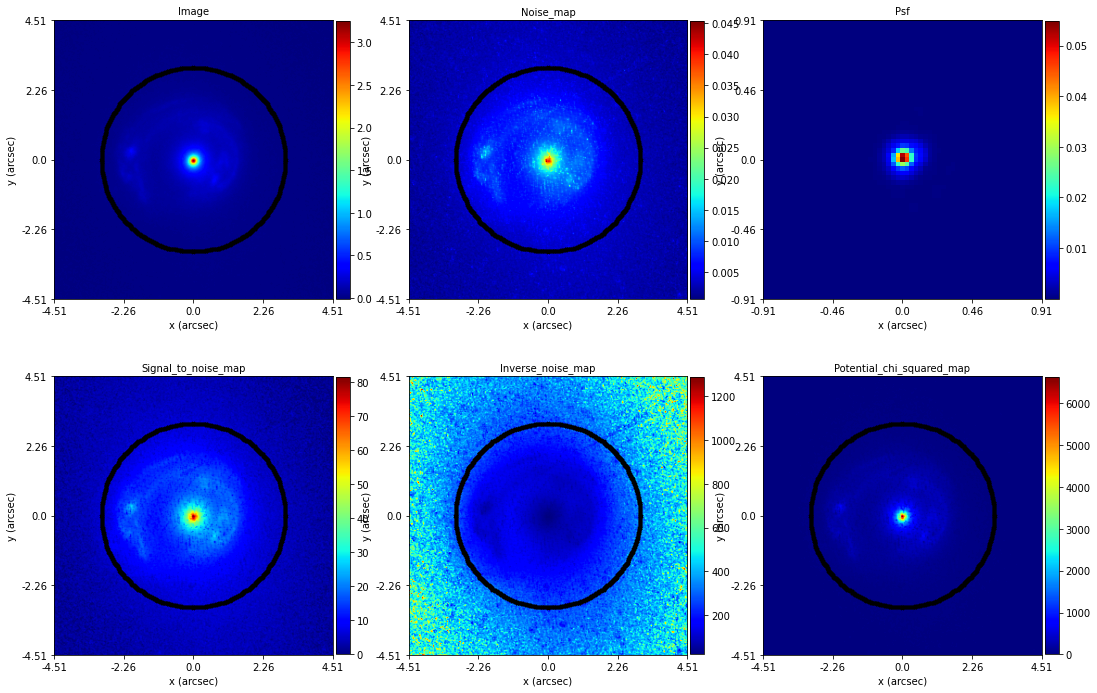

In [8]:
mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, radius=3.0
)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

__Settings__

The *PhaseSettingsImaging* describe how the model is fitted to the data in the log likelihood function. We discussed
these in chapter 2, and a full description of all settings can be found in the example script:

    'autolens_workspace/examples/model/customize/settings.py'.

The settings chosen here are applied to all phases in the pipeline.

In [6]:
settings = al.PhaseSettingsImaging(grid_class=al.Grid, sub_size=2)

__Pipeline_Setup_And_Tagging__:

For this pipeline the pipeline setup customizes:

 - If there is an external shear in the mass model or not.

The pipeline setup 'tags' the output path of a pipeline. For example, if 'no_shear' is True, the pipeline's output 
paths are 'tagged' with the string 'no_shear'.

This means you can run the same pipeline on the same data twice (with and without shear) and the results will go
to different output folders and thus not clash with one another!

In [7]:
setup = al.PipelineSetup(no_shear=True, folders=["my galaxy", "slacs"])

__Pipeline Creation__

To create a _Pipeline_, we call a 'make_pipeline' function, which is written in its own Python script: 

    'tutorial_1_pipeline_lens_and_source.py'. 
    
Before we check it out, lets get the pipeline running, by importing the script, running the 'make_pipeline' function
to create the _Pipeline_ object and calling that objects 'run' function.

The 'folders' below specify the path the pipeline results are written to, which is:

    'autolens_workspace/output/my galaxy/slacs/pipeline_name/setup_tag/phase_name/settings_tag'

In [ ]:
import slacs_pipeline

pipeline_lens_and_source = slacs_pipeline.make_pipeline(
    setup=setup, settings=settings
)

# Uncomment to run.
results = pipeline_lens_and_source.run(dataset=imaging, mask=mask)

INFO:autofit.tools.pipeline:Running Phase phase_1__lens_sersic (Number 0)
INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
INFO:root:No Dynesty samples found, beginning new non-linear search. 
148it [04:39,  1.34s/it, bound: 10 | nc: 5 | ncall: 1364 | eff(%): 10.850 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz: 771981.890 >  5.000]/home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
267it [08:42,  1.96s/it, +30 | bound: 50 | nc: 1 | ncall: 2535 | eff(%): 11.716 | loglstar:   -inf < -212621.053 <    inf | logz: -212633.935 +/-    nan | dlogz:  1.099 >  5.000]
INFO:root:2500 Iterations: Performing update (Visualization, outputting samples, etc.).
527it [08:28,  1.04it/s, +30 | bound: 130 | nc: 1 | ncall: 5044 | eff(